In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts2.csv')  # Replace with the actual file path

# Filter columns of interest
columns_of_interest = ['PLAYER_NAME', 'Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Outlook_Preprocessed', 'Bust']
data_filtered = data[columns_of_interest].dropna()  # Drop rows with missing values

# Combine the preprocessed columns
data_filtered['Combined_Preprocessed'] = data_filtered['Strengths_Preprocessed'] + ' ' + data_filtered['Weaknesses_Preprocessed'] + ' ' + data_filtered['Outlook_Preprocessed']

# Prepare the data and labels
X = data_filtered['Combined_Preprocessed']
y = data_filtered['Bust']

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform the text columns into document-term matrices
X_vec = vectorizer.fit_transform(X)

# Initialize the models
bernoulli_model = BernoulliNB()
multinomial_model = MultinomialNB()

# Fit the models
bernoulli_model.fit(X_vec, y)
multinomial_model.fit(X_vec, y)

# Print top features and phrases for each label
for label_idx, label_name in enumerate(bernoulli_model.classes_):
    print(f"Top features and phrases for label '{label_name}':")
    feature_prob_pairs = []
    for feature_idx in range(X_vec.shape[1]):
        feature_prob = bernoulli_model.feature_log_prob_[label_idx, feature_idx]
        feature_prob_pairs.append((feature_prob, vectorizer.get_feature_names()[feature_idx]))
    top_features = sorted(feature_prob_pairs, reverse=True)[:10]
    for feature_prob, feature_name in top_features:
        print(f"{feature_name}: {feature_prob}")
    print("\n")


Top features and phrases for label 'N':


C:\Users\beaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


game: -0.049596941139371964
ball: -0.049596941139371964
shot: -0.06669137449867257
get: -0.06669137449867257
play: -0.10178269430994202
good: -0.10178269430994202
well: -0.1198011998126205
player: -0.13815033848081715
nba: -0.1568424714929697
ability: -0.1568424714929697


Top features and phrases for label 'TBD':
game: -0.01709443335930061
shot: -0.025752496102414923
player: -0.061154423153331194
good: -0.061154423153331194
ball: -0.061154423153331194
shooting: -0.07020425867324853
play: -0.07020425867324853
time: -0.09785579000375932
rim: -0.09785579000375932
level: -0.10724553035359818


Top features and phrases for label 'Y':
shot: -0.016260520871780315
game: -0.049596941139371964
nba: -0.0840831172105414
player: -0.10178269430994202
ball: -0.13815033848081715
good: -0.1568424714929697
get: -0.1568424714929697
ability: -0.1568424714929697
well: -0.17589066646366414
point: -0.17589066646366414




In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    if isinstance(text, str):
        # Remove special characters
        text = text.replace('â€¦', '').replace('â€“', '-').replace('â€™', "'")
        
        # Convert text to lowercase
        text = text.lower()
        
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        
        # Tokenize the text
        words = word_tokenize(text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        
        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
        
        # Join the cleaned words back into a text
        cleaned_text = ' '.join(words)
        
        return cleaned_text
    else:
        return ""

# Read the data from the CSV file
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\draft_post2000_comb.csv')

# Specify the columns to preprocess
columns_to_preprocess = ['Strengths', 'Weaknesses', 'Outlook']

# Preprocess each column
for column in columns_to_preprocess:
    data[column + '_Preprocessed'] = data[column].apply(preprocess_text)

# Save the updated data to a new CSV file
data.to_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\draft_post2000_labeled2.csv', index=False)


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\draft_post2000_labeled2.csv')  # Replace with the actual file path

# Filter columns of interest
columns_of_interest = ['PLAYER_NAME', 'Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Outlook_Preprocessed', 'Bust']
data_filtered = data[columns_of_interest].dropna()  # Drop rows with missing values

# Combine the preprocessed columns
data_filtered['Combined_Preprocessed'] = data_filtered['Strengths_Preprocessed'] + ' ' + data_filtered['Weaknesses_Preprocessed'] + ' ' + data_filtered['Outlook_Preprocessed']

# Prepare the data and labels
X = data_filtered['Combined_Preprocessed']
y = data_filtered['Bust']

# Initialize CountVectorizer with bi-grams (2-grams) only
ngram_range = (2, 2)
vectorizer = CountVectorizer(ngram_range=ngram_range)

# Transform the text columns into document-term matrices using bi-grams
X_vec = vectorizer.fit_transform(X)

# Initialize the models
bernoulli_model = BernoulliNB()
multinomial_model = MultinomialNB()

# Fit the models
bernoulli_model.fit(X_vec, y)
multinomial_model.fit(X_vec, y)

# Print top N-grams for each label
for label_idx, label_name in enumerate(bernoulli_model.classes_):
    print(f"Top N-grams for label '{label_name}':")
    features = vectorizer.get_feature_names_out()
    coef = bernoulli_model.coef_[label_idx]
    top_ngrams_indices = coef.argsort()[-10:]  # Get top 10 N-grams
    top_ngrams = [features[idx] for idx in top_ngrams_indices]
    for ngram in top_ngrams:
        print(ngram)
    print("\n")

Top N-grams for label 'N':
standing reach
high school
jordan brand
brand classic
ball handler
next level
first step
half court
free throw
per game


Top N-grams for label 'TBD':
steal per
shot blocker
good rebounder
ball handler
pick roll
throw shooter
point per
next level
free throw
per game


Top N-grams for label 'Y':
good job
ball handling
need improve
first step
jump shot
feel game
pick roll
free throw
per game
next level




C:\Users\beaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\draft_post2000_labeled2.csv')  # Replace with the actual file path

# Filter columns of interest
columns_of_interest = ['PLAYER_NAME', 'Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Outlook_Preprocessed', 'Bust']
data_filtered = data[columns_of_interest].dropna()  # Drop rows with missing values

# Drop rows with 'TBD' labels
data_filtered = data_filtered[data_filtered['Bust'] != 'TBD']

# Combine the preprocessed columns
data_filtered['Combined_Preprocessed'] = data_filtered['Strengths_Preprocessed'] + ' ' + data_filtered['Weaknesses_Preprocessed'] + ' ' + data_filtered['Outlook_Preprocessed']

# Prepare the data and labels
X = data_filtered['Combined_Preprocessed']
y = data_filtered['Bust']

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize CountVectorizer with bi-grams (2-grams) only
ngram_range = (2, 2)
vectorizer = CountVectorizer(ngram_range=ngram_range)

# Transform the text columns into document-term matrices using bi-grams
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the models
bernoulli_model = BernoulliNB()
multinomial_model = MultinomialNB()

# Fit the models on the training data
bernoulli_model.fit(X_train_vec, y_train)
multinomial_model.fit(X_train_vec, y_train)

# Predict on the testing data
y_pred_bernoulli = bernoulli_model.predict(X_test_vec)
y_pred_multinomial = multinomial_model.predict(X_test_vec)

# Calculate accuracy for each model
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)

print(f"Accuracy of BernoulliNB model: {accuracy_bernoulli:.2f}")
print(f"Accuracy of MultinomialNB model: {accuracy_multinomial:.2f}")

Accuracy of BernoulliNB model: 0.56
Accuracy of MultinomialNB model: 0.67


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\draft_post2000_labeled2.csv')  # Replace with the actual file path

# Filter columns of interest
columns_of_interest = ['PLAYER_NAME', 'Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Outlook_Preprocessed', 'Bust']
data_filtered = data[columns_of_interest].dropna()  # Drop rows with missing values

# Drop rows with 'TBD' labels
data_filtered = data_filtered[data_filtered['Bust'] != 'TBD']

# Combine the preprocessed columns
data_filtered['Combined_Preprocessed'] = data_filtered['Strengths_Preprocessed'] + ' ' + data_filtered['Weaknesses_Preprocessed'] + ' ' + data_filtered['Outlook_Preprocessed']

# Prepare the data and labels
X = data_filtered['Combined_Preprocessed']
y = data_filtered['Bust']

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform the text columns into TF-IDF document-term matrices
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the models
bernoulli_model = BernoulliNB()
multinomial_model = MultinomialNB()

# Fit the models on the training data
bernoulli_model.fit(X_train_vec, y_train)
multinomial_model.fit(X_train_vec, y_train)

# Predict on the testing data
y_pred_bernoulli = bernoulli_model.predict(X_test_vec)
y_pred_multinomial = multinomial_model.predict(X_test_vec)

# Calculate accuracy for each model
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)

print(f"Accuracy of BernoulliNB model: {accuracy_bernoulli:.2f}")
print(f"Accuracy of MultinomialNB model: {accuracy_multinomial:.2f}")


Accuracy of BernoulliNB model: 0.78
Accuracy of MultinomialNB model: 0.56


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\draft_post2000_labeled2.csv')  # Replace with the actual file path

# Filter columns of interest
columns_of_interest = ['PLAYER_NAME', 'Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Outlook_Preprocessed', 'Bust']
data_filtered = data[columns_of_interest].dropna()  # Drop rows with missing values

# Drop rows with 'TBD' labels
data_filtered = data_filtered[data_filtered['Bust'] != 'TBD']

# Combine the preprocessed columns
data_filtered['Combined_Preprocessed'] = data_filtered['Strengths_Preprocessed'] + ' ' + data_filtered['Weaknesses_Preprocessed'] + ' ' + data_filtered['Outlook_Preprocessed']

# Prepare the data and labels
X = data_filtered['Combined_Preprocessed']
y = data_filtered['Bust']

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Count of X_train: {len(X_train)}")
print(f"Count of y_train: {len(y_train)}")

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform the text columns into document-term matrices
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the SVM model
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train_vec, y_train)

# Predict on the testing data
y_pred = svm_model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM model: {accuracy:.2f}")


Count of X_train: 76
Count of y_train: 76
Accuracy of SVM model: 0.56


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import shap

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts2.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Outlook_Preprocessed', 'Bust2']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' labels
data_filtered = data_filtered[data_filtered['Bust2'] != 'TBD']
data_filtered = data_filtered[data_filtered['Bust2'] != 'MID']

# Prepare the data and labels
X = data_filtered[['Strengths_Preprocessed']]
y = data_filtered['Bust2']

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Create an SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1)  # Linear kernel

# Cross-validation for predictions
y_pred_svm = cross_val_predict(svm_model, vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1)), y, cv=5)

# Print classification report
classification_rep = classification_report(y, y_pred_svm)
print("Cross-Validation Classification Report:\n", classification_rep)

Cross-Validation Classification Report:
               precision    recall  f1-score   support

           N       0.67      0.71      0.69        75
           Y       0.45      0.41      0.43        44

    accuracy                           0.60       119
   macro avg       0.56      0.56      0.56       119
weighted avg       0.59      0.60      0.59       119



In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\draft_post2000_labeled2.csv')  # Replace with the actual file path

# Filter columns of interest
columns_of_interest = ['PLAYER_NAME', 'Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Outlook_Preprocessed', 'Bust2']
data_filtered = data[columns_of_interest].dropna()  # Drop rows with missing values

# Drop rows with 'TBD' labels
data_filtered = data_filtered[data_filtered['Bust2'] != 'TBD']

# Combine the preprocessed columns
data_filtered['Combined_Preprocessed'] = data_filtered['Strengths_Preprocessed'] + ' ' + data_filtered['Weaknesses_Preprocessed'] + ' ' + data_filtered['Outlook_Preprocessed']

# Prepare the data and labels
X = data_filtered['Combined_Preprocessed']
y = data_filtered['Bust2']

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform the text columns into TF-IDF document-term matrices
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the BernoulliNB model
bernoulli_model = BernoulliNB()

# Fit the BernoulliNB model on the training data
bernoulli_model.fit(X_train_vec, y_train)

# Predict on the testing data
y_pred_bernoulli = bernoulli_model.predict(X_test_vec)

# Calculate accuracy for the BernoulliNB model
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)

print(f"Accuracy of BernoulliNB model: {accuracy_bernoulli:.2f}")

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print top features for each label
for i, label in enumerate(bernoulli_model.classes_):
    top_features = sorted(
        zip(bernoulli_model.feature_log_prob_[i], feature_names),
        reverse=True
    )[:10]
    print(f"Top features for label '{label}':")
    for prob, feature in top_features:
        print(f"Feature: {feature}, Probability: {prob:.4f}")
    print()


Accuracy of BernoulliNB model: 0.67
Top features for label 'N':
Feature: shot, Probability: -0.0194
Feature: game, Probability: -0.0392
Feature: ball, Probability: -0.0392
Feature: well, Probability: -0.0594
Feature: rim, Probability: -0.0800
Feature: get, Probability: -0.0800
Feature: ability, Probability: -0.0800
Feature: play, Probability: -0.1226
Feature: good, Probability: -0.1226
Feature: point, Probability: -0.1446

Top features for label 'Y':
Feature: shot, Probability: -0.0377
Feature: nba, Probability: -0.0377
Feature: game, Probability: -0.0770
Feature: ball, Probability: -0.0770
Feature: solid, Probability: -0.1178
Feature: play, Probability: -0.1178
Feature: good, Probability: -0.1178
Feature: get, Probability: -0.1178
Feature: well, Probability: -0.1603
Feature: point, Probability: -0.1603



In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')

# Filter columns of interest
columns_of_interest = ['PLAYER_NAME', 'Strengths_Preprocessed', 'Weaknesses_Preprocessed','Bust','Bust2', 'Bust3', 'Bust4']
data_filtered = data[columns_of_interest].dropna()

# Separate data with 'TBD' labels from 2023
data_tbd = data_filtered[data_filtered['Bust3'] == 'TBD']
X_tbd = data_tbd[['Strengths_Preprocessed', 'Weaknesses_Preprocessed']]
player_names_tbd = data_tbd['PLAYER_NAME']

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust3'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]
# Remove data with 'TBD' labels
print(data_filtered.shape)
data_filtered = data_filtered.sample(n=250, random_state=42)
print(data_filtered.shape)
# Prepare the data and labels
X = data_filtered[['Strengths_Preprocessed', 'Weaknesses_Preprocessed']]
y = data_filtered['Bust3']

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x), axis=1))
X_test_vec = vectorizer.transform(X_test.apply(lambda x: ' '.join(x), axis=1))

# Create an SVM model with a non-linear kernel
svm_model = SVC(kernel='poly', C=1) #poly: polynomial kernel, default parameters

# Fit the model on the training data
svm_model.fit(X_train_vec, y_train)

# Convert the sparse matrix to a dense numpy array
X_test_dense = X_test_vec.toarray()

# Get predictions on the testing data
y_pred_svm = svm_model.predict(X_test_dense)

# Print classification report
classification_rep = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", classification_rep)

# Make predictions on 'TBD' data from 2023
X_tbd_vec = vectorizer.transform(X_tbd.apply(lambda x: ' '.join(x), axis=1))
y_pred_tbd = svm_model.predict(X_tbd_vec)

# Print player names and their predicted labels for 2023
print("\nPredictions for 'TBD' labels in 2023:")
for player, pred in zip(player_names_tbd, y_pred_tbd):
    print(f"Player: {player}, Predicted Label: {pred}")
    
#Classification Report:
#               precision    recall  f1-score   support
#
#           N       0.75      1.00      0.86         6
#           Y       1.00      0.33      0.50         3
#
#    accuracy                           0.78         9
#   macro avg       0.88      0.67      0.68         9
#weighted avg       0.83      0.78      0.74         9


(545, 7)
(250, 7)
Classification Report:
               precision    recall  f1-score   support

           N       0.78      0.95      0.86        19
           Y       0.50      0.17      0.25         6

    accuracy                           0.76        25
   macro avg       0.64      0.56      0.55        25
weighted avg       0.71      0.76      0.71        25


Predictions for 'TBD' labels in 2023:
Player: Theo Maledon, Predicted Label: N
Player: Alperen Sengun, Predicted Label: N
Player: RJ Hampton, Predicted Label: N
Player: Nikola Jovic, Predicted Label: N
Player: Moussa Diabate, Predicted Label: N
Player: Jalen Pickett, Predicted Label: N
Player: Filip Petrusev, Predicted Label: Y
Player: Yam Madar, Predicted Label: N
Player: Justinian Jessup, Predicted Label: N
Player: Juhann Begarin, Predicted Label: N
Player: Jalen Wilson, Predicted Label: N
Player: Rokas Jokubaitis, Predicted Label: N
Player: EJ Liddell, Predicted Label: N
Player: Gui Santos, Predicted Label: N
Player: Ga

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts2.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Outlook_Preprocessed', 'Bust2']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]
print(data_filtered.shape)
# Select the first 200 samples for each class
y_class = data_filtered[data_filtered['Bust2'] == 'Y']
n_class = data_filtered[data_filtered['Bust2'] == 'N']
print(y_class.shape)
print(n_class.shape)
# Combine the selected samples
balanced_data = pd.concat([y_class, n_class], axis=0)

# Prepare the data and labels
X = balanced_data[['Strengths_Preprocessed']]
y = balanced_data['Bust2']

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x), axis=1))
X_test_vec = vectorizer.transform(X_test.apply(lambda x: ' '.join(x), axis=1))

# Create an SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1)

# Fit the model on the training data
svm_model.fit(X_train_vec, y_train)

# Convert the sparse matrix to a dense numpy array
X_test_dense = X_test_vec.toarray()

# Get predictions on the testing data
y_pred_svm = svm_model.predict(X_test_dense)

# Print classification report
classification_rep = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", classification_rep)

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients from the model
coefficients = svm_model.coef_[0].toarray()[0]  # Convert to dense array

# Create a dictionary to store feature names and coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Print the rank list of features based on their importance
print("Feature Rank List:")
for feature, coef in sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {coef:.4f}")

(119, 4)
(44, 4)
(75, 4)
Classification Report:
               precision    recall  f1-score   support

           N       0.80      1.00      0.89         8
           Y       1.00      0.50      0.67         4

    accuracy                           0.83        12
   macro avg       0.90      0.75      0.78        12
weighted avg       0.87      0.83      0.81        12

Feature Rank List:
become: 0.0930
shown: 0.0922
best: 0.0913
smaller: 0.0827
versatile: 0.0761
block: 0.0735
lot: 0.0715
potential: 0.0630
he: 0.0618
lane: 0.0612
vision: 0.0610
basket: 0.0604
developed: 0.0601
rebounder: 0.0580
body: 0.0577
league: 0.0577
turnover: 0.0559
effective: 0.0544
center: 0.0542
strength: 0.0538
face: 0.0529
jumper: 0.0522
obryant: 0.0520
get: 0.0517
dribble: 0.0504
school: 0.0497
fake: 0.0492
take: 0.0491
way: 0.0487
wing: 0.0475
610: 0.0473
make: 0.0472
playing: 0.0470
terrific: 0.0468
character: 0.0466
explosiveness: 0.0440
side: 0.0427
board: 0.0404
nba: 0.0400
second: 0.0394
pf: 0.0391

great: -0.0365
find: -0.0366
converting: -0.0368
hell: -0.0377
assist: -0.0383
undersized: -0.0387
due: -0.0388
next: -0.0390
skillset: -0.0392
two: -0.0392
tempo: -0.0399
prospect: -0.0401
reach: -0.0401
athleticism: -0.0402
general: -0.0404
rarely: -0.0411
eybl: -0.0414
grab: -0.0414
sec: -0.0420
always: -0.0423
open: -0.0423
average: -0.0423
impressive: -0.0428
point: -0.0431
finished: -0.0451
rim: -0.0455
67: -0.0456
bigtime: -0.0458
fourth: -0.0459
aspect: -0.0463
allen: -0.0464
instinct: -0.0470
beat: -0.0471
percentage: -0.0478
size: -0.0484
pas: -0.0488
able: -0.0491
shot: -0.0492
multiple: -0.0505
go: -0.0509
contact: -0.0513
half: -0.0522
defense: -0.0534
really: -0.0542
energy: -0.0547
basketball: -0.0547
finish: -0.0549
reliable: -0.0551
floor: -0.0562
looking: -0.0576
scorer: -0.0589
score: -0.0602
run: -0.0614
steal: -0.0648
big: -0.0650
seems: -0.0661
back: -0.0698
within: -0.0729
per: -0.0730
lack: -0.0735
allow: -0.0864
defensive: -0.0875
end: -0.0909
averaged: -0.0918

(820, 3)
(200, 3)
(200, 3)
Classification Report:
               precision    recall  f1-score   support

           N       1.00      0.26      0.42        19
           Y       0.60      1.00      0.75        21

    accuracy                           0.65        40
   macro avg       0.80      0.63      0.58        40
weighted avg       0.79      0.65      0.59        40



C:\Users\beaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


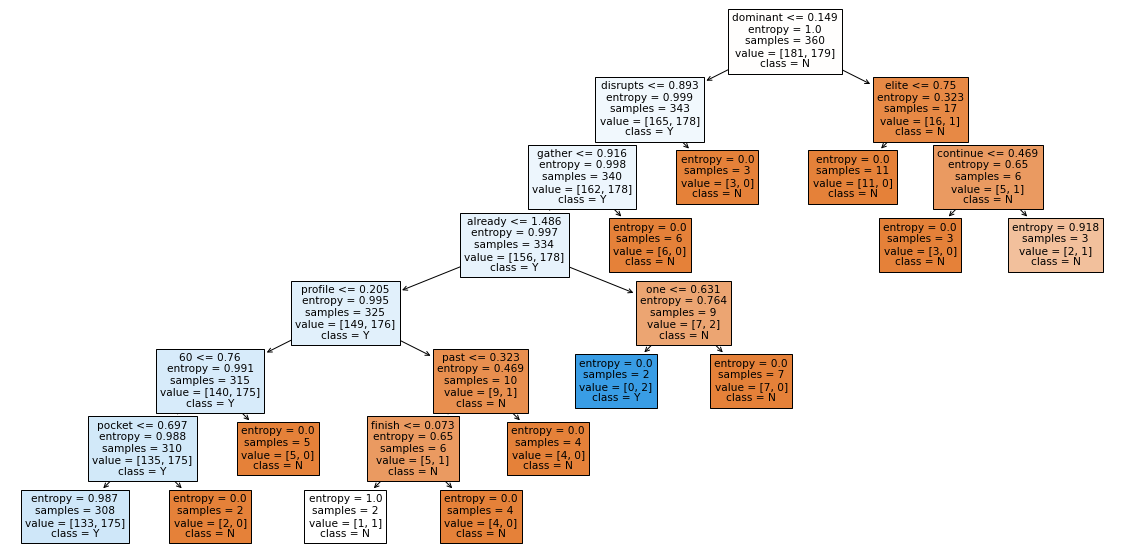

Important Features:
dominant: 0.23083507181890603
one: 0.13385869319303556
gather: 0.12655817905005867
profile: 0.1265280238096473
60: 0.11526445335288998
disrupts: 0.06204258038593006
already: 0.05247041103292486
pocket: 0.04691915165915066
finish: 0.0369810150287429
elite: 0.0308815110311584
continue: 0.02228915736110097
past: 0.015371752276454457


In [40]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Bust4']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]
print(data_filtered.shape)
# Select the first 200 samples for each class
y_class = data_filtered[data_filtered['Bust4'] == 'Y'].head(200)
n_class = data_filtered[data_filtered['Bust4'] == 'N'].head(200)
print(y_class.shape)
print(n_class.shape)
# Combine the selected samples
balanced_data = pd.concat([y_class, n_class], axis=0)

# Prepare the data and labels
X = balanced_data[['Strengths_Preprocessed']]
y = balanced_data['Bust4']

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x), axis=1))

# Define Decision Tree model with adjusted parameters
tree_model = DecisionTreeClassifier(
    max_depth=7,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='entropy',
    class_weight=None,
    splitter='random',
    random_state=42
)

# Fit the model on the training data
tree_model.fit(X_train_vec, y_train)

# Print the classification report
X_test_vec = vectorizer.transform(X_test.apply(lambda x: ' '.join(x), axis=1))
y_pred_tree = tree_model.predict(X_test_vec)
classification_rep = classification_report(y_test, y_pred_tree)
print("Classification Report:\n", classification_rep)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=vectorizer.get_feature_names(), class_names=tree_model.classes_, filled=True)
plt.show()

# Print the important features
importance = tree_model.feature_importances_
important_features = [(feature, importance) for feature, importance in zip(vectorizer.get_feature_names(), importance) if importance > 0]
important_features = sorted(important_features, key=lambda x: x[1], reverse=True)
print("Important Features:")
for feature, importance in important_features:
    print(f"{feature}: {importance}")

(545, 6)
(250, 6)
Classification Report:
               precision    recall  f1-score   support

           N       0.74      0.89      0.81        19
           Y       0.00      0.00      0.00         6

    accuracy                           0.68        25
   macro avg       0.37      0.45      0.40        25
weighted avg       0.56      0.68      0.62        25



C:\Users\beaud\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


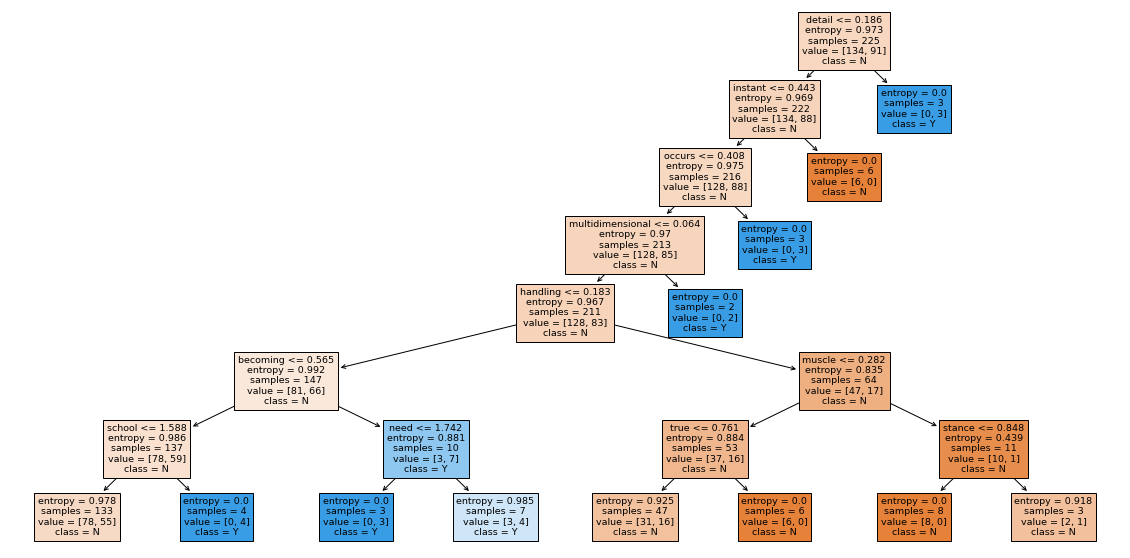

Important Features:
school: 0.1390831313956752
handling: 0.13085419444074456
instant: 0.12432696633297899
detail: 0.11070128429688711
occurs: 0.10985400449183585
true: 0.09346646436403407
multidimensional: 0.07465378739639407
stance: 0.05811799313181526
becoming: 0.0555581001596632
need: 0.053555162379475524
muscle: 0.04982891161049625


In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed','Bust','Bust2', 'Bust3', 'Bust4']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust3'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]
# select labels
print(data_filtered.shape)
data_filtered = data_filtered.sample(n=250, random_state=42)
print(data_filtered.shape)

# Prepare the data and labels
X = data_filtered[['Strengths_Preprocessed', 'Weaknesses_Preprocessed']]
y = data_filtered['Bust3']

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Initialize CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x), axis=1))

# Define Decision Tree model with adjusted parameters
tree_model = DecisionTreeClassifier(
    max_depth=7,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='entropy',
    class_weight=None,
    splitter='random',
    random_state=42
)

# Fit the model on the training data
tree_model.fit(X_train_vec, y_train)

# Print the classification report
X_test_vec = vectorizer.transform(X_test.apply(lambda x: ' '.join(x), axis=1))
y_pred_tree = tree_model.predict(X_test_vec)
classification_rep = classification_report(y_test, y_pred_tree)
print("Classification Report:\n", classification_rep)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=vectorizer.get_feature_names(), class_names=tree_model.classes_, filled=True)
plt.show()

# Print the important features
importance = tree_model.feature_importances_
important_features = [(feature, importance) for feature, importance in zip(vectorizer.get_feature_names(), importance) if importance > 0]
important_features = sorted(important_features, key=lambda x: x[1], reverse=True)
print("Important Features:")
for feature, importance in important_features:
    print(f"{feature}: {importance}")

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Bust4']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]
print(data_filtered.shape)
# Select the first 200 samples for each class
y_class = data_filtered[data_filtered['Bust4'] == 'Y'].head(400)
n_class = data_filtered[data_filtered['Bust4'] == 'N'].head(400)

# Combine the selected samples
balanced_data = pd.concat([y_class, n_class], axis=0)

# Prepare the data and labels
X = balanced_data[['Strengths_Preprocessed']]
y = balanced_data['Bust4']

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x), axis=1))
X_test_vec = vectorizer.transform(X_test.apply(lambda x: ' '.join(x), axis=1))

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_vec.toarray())

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    class_weight='balanced'
)

# Fit the model on the training data
rf_model.fit(X_train_vec, y_train)

# Get predictions on the testing data
y_pred_rf = rf_model.predict(X_test_vec)

# Print classification report
classification_rep = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", classification_rep)

(820, 3)
Random Forest Classification Report:
               precision    recall  f1-score   support

           N       0.64      0.57      0.61        40
           Y       0.61      0.68      0.64        40

    accuracy                           0.62        80
   macro avg       0.63      0.62      0.62        80
weighted avg       0.63      0.62      0.62        80



(812, 3)


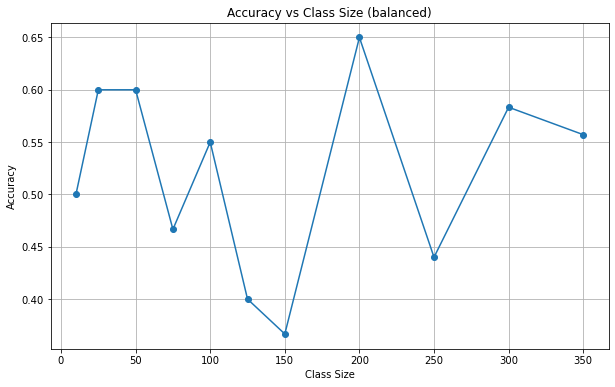

In [99]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts2.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Bust2']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]

# Different class sizes to try
class_sizes = [10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 350]
accuracies = []
print(data_filtered.shape)
for size in class_sizes:
    # Select samples for each class
    y_class = data_filtered[data_filtered['Bust2'] == 'Y'].sample(n=size, random_state=42)
    n_class = data_filtered[data_filtered['Bust2'] == 'N'].sample(n=size, random_state=42)

    # Combine the selected samples
    balanced_data = pd.concat([y_class, n_class], axis=0)
    
    # Prepare the data and labels
    X = balanced_data[['Strengths_Preprocessed','Weaknesses_Preprocessed']]
    y = balanced_data['Bust2']
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.1, random_state=42)
    
    # Create an SVM model with a linear kernel
    svm_model = SVC(kernel='poly', C=1)
    
    # Fit the model on the training data
    svm_model.fit(X_train, y_train)
    
    # Get predictions on the testing data
    y_pred_svm = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = (y_pred_svm == y_test).mean()
    
    accuracies.append(accuracy)

# Plot accuracy vs class size
plt.figure(figsize=(10, 6))
plt.plot(class_sizes, accuracies, marker='o')
plt.xlabel('Class Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Class Size (balanced)')
plt.grid(True)
plt.show()


(812, 3)


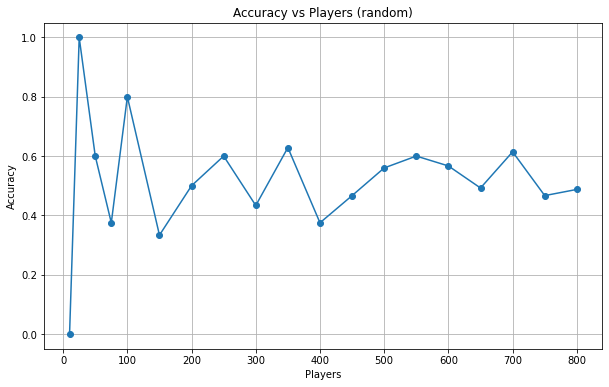

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts2.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed','Bust2']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]

# Different class sizes to try
class_sizes = [10, 25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
accuracies = []
print(data_filtered.shape)
for size in class_sizes:
    # Randomly sample samples from both classes combined
    sampled_data = data_filtered.sample(n=size, random_state=42)
    
    # Prepare the data and labels
    X = sampled_data[['Strengths_Preprocessed','Weaknesses_Preprocessed']]
    y = sampled_data['Bust2']
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.1, random_state=42)
    
    # Create an SVM model with a linear kernel
    svm_model = SVC(kernel='poly', C=1)
    
    # Fit the model on the training data
    svm_model.fit(X_train, y_train)
    
    # Get predictions on the testing data
    y_pred_svm = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = (y_pred_svm == y_test).mean()
    
    accuracies.append(accuracy)
# Plot accuracy vs class size
plt.figure(figsize=(10, 6))
plt.plot(class_sizes, accuracies, marker='o')
plt.xlabel('Players')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Players (random)')
plt.grid(True)
plt.show()

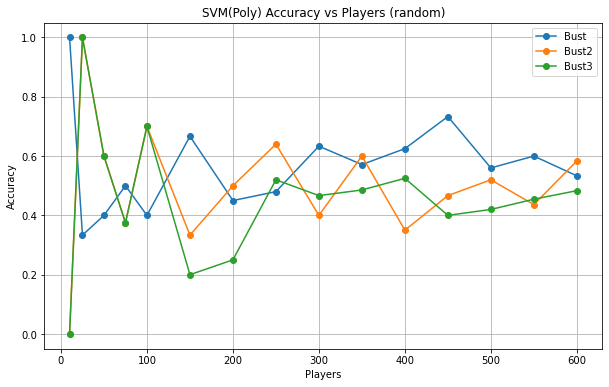

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts2.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed','Bust','Bust2', 'Bust3']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]

# Different class sizes to try
class_sizes = [10, 25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
accuracies_bust = []
accuracies_bust2 = []
accuracies_bust3 = []

for size in class_sizes:
    # Randomly sample samples from both classes combined
    sampled_data = data_filtered.sample(n=size, random_state=42)
    
    # Prepare the data and labels
    X = sampled_data[['Strengths_Preprocessed','Weaknesses_Preprocessed']]
    y_bust = sampled_data['Bust']
    y_bust2 = sampled_data['Bust2']
    y_bust3 = sampled_data['Bust3']
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train_bust, y_test_bust = train_test_split(X_dense, y_bust, test_size=0.1, random_state=42)
    _, _, y_train_bust2, y_test_bust2 = train_test_split(X_dense, y_bust2, test_size=0.1, random_state=42)
    _, _, y_train_bust3, y_test_bust3 = train_test_split(X_dense, y_bust3, test_size=0.1, random_state=42)
    
    # Create an SVM model with a polynomial kernel
    svm_model = SVC(kernel='poly', C=1)
    
    # Fit the model on the training data for Bust
    svm_model.fit(X_train, y_train_bust)
    
    # Get predictions on the testing data for Bust
    y_pred_svm_bust = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust
    accuracy_bust = (y_pred_svm_bust == y_test_bust).mean()
    
    accuracies_bust.append(accuracy_bust)
    
    # Fit the model on the training data for Bust2
    svm_model.fit(X_train, y_train_bust2)
    
    # Get predictions on the testing data for Bust2
    y_pred_svm_bust2 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust2
    accuracy_bust2 = (y_pred_svm_bust2 == y_test_bust2).mean()
    
    accuracies_bust2.append(accuracy_bust2)
    
    # Fit the model on the training data for Bust3
    svm_model.fit(X_train, y_train_bust3)
    
    # Get predictions on the testing data for Bust3
    y_pred_svm_bust3 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust3
    accuracy_bust3 = (y_pred_svm_bust3 == y_test_bust3).mean()
    
    accuracies_bust3.append(accuracy_bust3)

# Plot accuracy vs class size for Bust, Bust2 and Bust3
plt.figure(figsize=(10, 6))
plt.plot(class_sizes, accuracies_bust, marker='o', label='Bust')
plt.plot(class_sizes, accuracies_bust2, marker='o', label='Bust2')
plt.plot(class_sizes, accuracies_bust3, marker='o', label='Bust3')
plt.xlabel('Players')
plt.ylabel('Accuracy')
plt.title('SVM(Poly) Accuracy vs Players (random)')
plt.legend()
plt.grid(True)
plt.show()


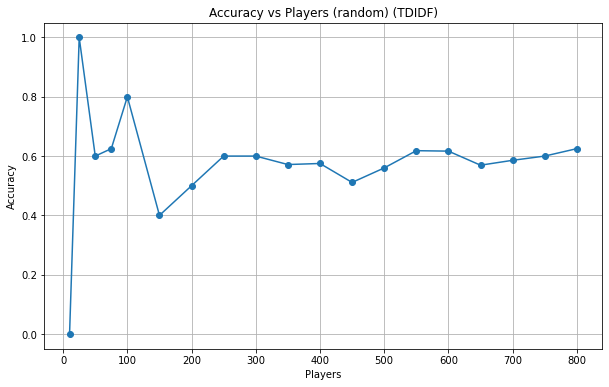

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts2.csv')

# Filter columns of interest
columns_of_interest = ['Strengths', 'Weaknesses', 'Bust2']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]

# Different class sizes to try
class_sizes = [10, 25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
accuracies = []

for size in class_sizes:
    # Randomly sample samples from both classes combined
    sampled_data = data_filtered.sample(n=size, random_state=42)
    
    # Prepare the data and labels
    X = sampled_data[['Strengths', 'Weaknesses']]
    y = sampled_data['Bust2']
    
    # Initialize TfidfVectorizer
    vectorizer = TfidfVectorizer()
    X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.1, random_state=42)
    
    # Create an SVM model with a linear kernel
    svm_model = SVC(kernel='poly', C=1)
    
    # Fit the model on the training data
    svm_model.fit(X_train, y_train)
    
    # Get predictions on the testing data
    y_pred_svm = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = (y_pred_svm == y_test).mean()
    
    accuracies.append(accuracy)
    
# Plot accuracy vs class size
plt.figure(figsize=(10, 6))
plt.plot(class_sizes, accuracies, marker='o')
plt.xlabel('Players')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Players (random) (TDIDF)')
plt.grid(True)
plt.show()


(803, 4)


C:\Users\beaud\AppData\Local\Temp\ipykernel_21044\2369477125.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Overall'] = X['Overall'].apply(lambda x: str(x))
C:\Users\beaud\AppData\Local\Temp\ipykernel_21044\2369477125.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Overall'] = X['Overall'].apply(lambda x: str(x))
C:\Users\beaud\AppData\Local\Temp\ipykernel_21044\2369477125.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

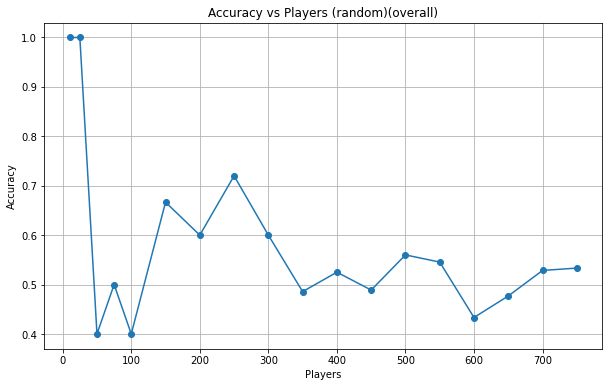

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Overall', 'Bust4']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]
# Convert "Overall" column to numeric, ignoring errors
data_filtered['Overall'] = pd.to_numeric(data_filtered['Overall'], errors='coerce')
print(data_filtered.shape)
# Different class sizes to try
class_sizes = [10, 25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750]
accuracies = []

for size in class_sizes:
    # Randomly sample samples from both classes combined
    sampled_data = data_filtered.sample(n=size, random_state=42)
    
    # Prepare the data and labels
    X = sampled_data[['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Overall']]
    y = sampled_data['Bust4']
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    # Convert "Overall" column to strings before joining
    X['Overall'] = X['Overall'].apply(lambda x: str(x))
    X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.1, random_state=42)
    
    # Create an SVM model with a polynomial kernel
    svm_model = SVC(kernel='poly', C=1)
    
    # Fit the model on the training data
    svm_model.fit(X_train, y_train)
    
    # Get predictions on the testing data
    y_pred_svm = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = (y_pred_svm == y_test).mean()
    
    accuracies.append(accuracy)

# Plot accuracy vs class size
plt.figure(figsize=(10, 6))
plt.plot(class_sizes, accuracies, marker='o')
plt.xlabel('Players')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Players (random)(overall)')
plt.grid(True)
plt.show()


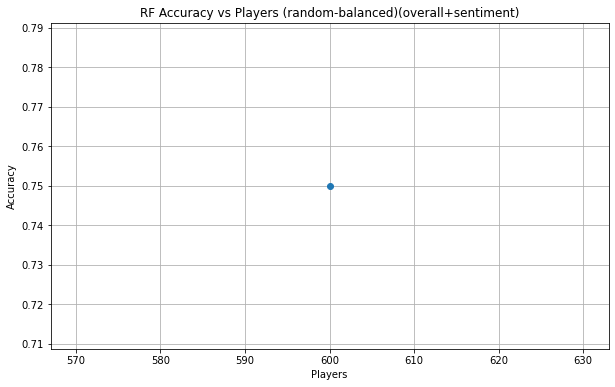

In [75]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3s.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Overall', 'Bust4', 'SScore']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]

# Convert "Overall" column to numeric, ignoring errors
data_filtered['Overall'] = pd.to_numeric(data_filtered['Overall'], errors='coerce')
data_filtered['SScore'] = pd.to_numeric(data_filtered['SScore'], errors='coerce')

# Different class sizes to try
class_sizes = [600]
accuracies = []

for size in class_sizes:
    # Select samples for each class
    y_class = data_filtered[data_filtered['Bust4'] == 'Y'].sample(n=size//2, random_state=42)
    n_class = data_filtered[data_filtered['Bust4'] == 'N'].sample(n=size//2, random_state=42)
    
    # Combine the selected samples
    balanced_data = pd.concat([y_class, n_class], axis=0)
    
    # Prepare the data and labels
    X = balanced_data[['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'SScore', 'Overall']]
    y = balanced_data['Bust4']
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    
    # Join all text columns with spaces
    X['Text'] = X[['Strengths_Preprocessed', 'Weaknesses_Preprocessed']].apply(lambda x: ' '.join(x), axis=1)

    # Convert "Overall" and "SScore" columns to strings before joining
    X['Overall'] = X['Overall'].apply(lambda x: str(x))
    X['SScore'] = X['SScore'].apply(lambda x: str(x))

    # Fit-transform the 'Text' column
    X_vec = vectorizer.fit_transform(X['Text'])
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.1, random_state=42)
    
    # Create an SVM model with a polynomial kernel
    rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    class_weight='balanced')
    
    # Fit the model on the training data
    rf_model.fit(X_train, y_train)
    
    # Get predictions on the testing data
    y_pred_rf = rf_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = (y_pred_rf == y_test).mean()
    
    accuracies.append(accuracy)

# Plot accuracy vs class size
plt.figure(figsize=(10, 6))
plt.plot(class_sizes, accuracies, marker='o')
plt.xlabel('Players')
plt.ylabel('Accuracy')
plt.title('RF Accuracy vs Players (random-balanced)(overall+sentiment)')
plt.grid(True)
plt.show()


In [82]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3s.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Overall', 'Bust4', 'SScore']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]

# Convert "Overall" column to numeric, ignoring errors
data_filtered['Overall'] = pd.to_numeric(data_filtered['Overall'], errors='coerce')
data_filtered['SScore'] = pd.to_numeric(data_filtered['SScore'], errors='coerce')

# Different class sizes to try
class_size = 600  # Train on 600 players
accuracies = []

# Select samples for each class
y_class = data_filtered[data_filtered['Bust4'] == 'Y'].sample(n=class_size // 2, random_state=42)
n_class = data_filtered[data_filtered['Bust4'] == 'N'].sample(n=class_size // 2, random_state=42)

# Combine the selected samples
balanced_data = pd.concat([y_class, n_class], axis=0)

# Prepare the data and labels
X_train = balanced_data[['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'SScore', 'Overall']]
y_train = balanced_data['Bust4']

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Join all text columns with spaces
X_train['Text'] = X_train[['Strengths_Preprocessed', 'Weaknesses_Preprocessed']].apply(lambda x: ' '.join(x), axis=1)

# Convert "Overall" and "SScore" columns to strings before joining
X_train['Overall'] = X_train['Overall'].apply(lambda x: str(x))
X_train['SScore'] = X_train['SScore'].apply(lambda x: str(x))

# Fit-transform the 'Text' column
X_vec = vectorizer.fit_transform(X_train['Text'])

# Convert the sparse matrix to a dense numpy array
X_dense = X_vec.toarray()

# Create and train a Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    class_weight='balanced'
)

# Fit the model on the training data
rf_model.fit(X_dense, y_train)

# Save the trained model and CountVectorizer for future use
joblib.dump(rf_model, 'trained_rf_model.pkl')
joblib.dump(vectorizer, 'count_vectorizer.pkl')

# Load the 2023 drafted player data (replace '2023_players.csv' with the actual file path)
drafted_2023_data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3s.csv')
drafted_2023_data = drafted_2023_data[drafted_2023_data['SEASON'].isin([2023])]

# Filter columns of interest for prediction
columns_of_interest = ['PLAYER_NAME','Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Overall', 'Bust4', 'SScore']
drafted_2023_data = drafted_2023_data[columns_of_interest].dropna()

# Join 'Strengths_Preprocessed' and 'Weaknesses_Preprocessed' with spaces to create 'Text' column
drafted_2023_data['Text'] = drafted_2023_data[['Strengths_Preprocessed', 'Weaknesses_Preprocessed']].apply(lambda x: ' '.join(x), axis=1)

# Convert 'Overall' and 'SScore' columns to strings before joining
drafted_2023_data['Overall'] = drafted_2023_data['Overall'].apply(lambda x: str(x))
drafted_2023_data['SScore'] = drafted_2023_data['SScore'].apply(lambda x: str(x))

# Load the CountVectorizer used during training
vectorizer = joblib.load('count_vectorizer.pkl')

# Fit-transform the 'Text' column using the same CountVectorizer
X_vec = vectorizer.transform(drafted_2023_data['Text'])

# Convert the sparse matrix to a dense numpy array
X_dense = X_vec.toarray()

# Use the trained Random Forest model to make predictions on the 2023 data
rf_model = joblib.load('trained_rf_model.pkl')  # Load the trained model

# Predictions for 2023 players
predictions = rf_model.predict(X_dense)

# Add the predictions to the 2023 drafted player data
drafted_2023_data['Predicted_Bust4'] = predictions

# Print the Player Name and Predicted Bust4 for each player
for index, row in drafted_2023_data.iterrows():
    print(f"Player: {row['PLAYER_NAME']}, Predicted Bust4: {row['Predicted_Bust4']}")

# The 'Predicted_Bust4' column now contains the predicted labels for the 2023 drafted players
# You can save this data to a CSV file or use it as needed.


Player: Jalen Pickett, Predicted Bust4: Y
Player: Jalen Wilson, Predicted Bust4: Y
Player: Scoot Henderson, Predicted Bust4: Y
Player: Julian Strawther, Predicted Bust4: Y
Player: Leonard Miller, Predicted Bust4: N
Player: Jaime Jaquez Jr, Predicted Bust4: Y
Player: Kris Murray, Predicted Bust4: N
Player: Marcus Sasser, Predicted Bust4: Y
Player: Isaiah Wong, Predicted Bust4: Y
Player: Trayce Jackson-Davis, Predicted Bust4: Y
Player: Mouhamed Gueye, Predicted Bust4: Y
Player: Sidy Cissoko, Predicted Bust4: Y
Player: Mojave King, Predicted Bust4: Y
Player: Victor Wembanyama, Predicted Bust4: N
Player: Brandon Miller, Predicted Bust4: Y
Player: Taylor Hendricks, Predicted Bust4: N
Player: Amen Thompson, Predicted Bust4: Y
Player: Ausar Thompson, Predicted Bust4: Y
Player: Anthony Black, Predicted Bust4: Y
Player: Gradey Dick, Predicted Bust4: N
Player: Rayan Rupert, Predicted Bust4: Y
Player: GG Jackson II, Predicted Bust4: N
Player: Cam Whitmore, Predicted Bust4: Y
Player: Jarace Walker

(545, 6)


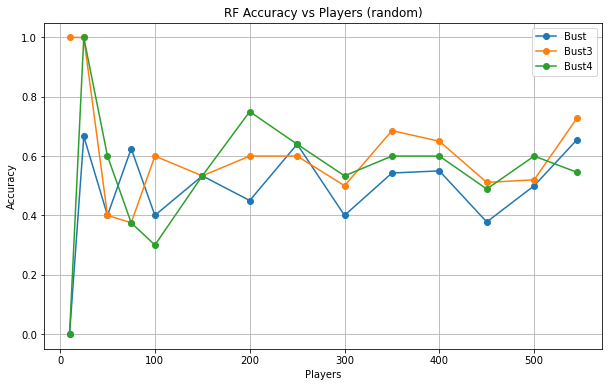

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed','Bust','Bust2', 'Bust3', 'Bust4']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust3'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]

print(data_filtered.shape)
# Different class sizes to try
class_sizes = [10, 25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500, 545]
accuracies_bust = []
accuracies_bust2 = []
accuracies_bust3 = []
accuracies_bust4 = []

for size in class_sizes:
    # Randomly sample samples from both classes combined
    sampled_data = data_filtered.sample(n=size, random_state=42)
    
    # Prepare the data and labels
    X = sampled_data[['Strengths_Preprocessed','Weaknesses_Preprocessed']]
    y_bust = sampled_data['Bust']
    y_bust2 = sampled_data['Bust2']
    y_bust3 = sampled_data['Bust3']
    y_bust4 = sampled_data['Bust4']
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train_bust, y_test_bust = train_test_split(X_dense, y_bust, test_size=0.1, random_state=42)
    _, _, y_train_bust2, y_test_bust2 = train_test_split(X_dense, y_bust2, test_size=0.1, random_state=42)
    _, _, y_train_bust3, y_test_bust3 = train_test_split(X_dense, y_bust3, test_size=0.1, random_state=42)
    _, _, y_train_bust4, y_test_bust4 = train_test_split(X_dense, y_bust4, test_size=0.1, random_state=42)
    
     # Initialize Random Forest model
    svm_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    class_weight='balanced')
    # Fit the model on the training data for Bust
    svm_model.fit(X_train, y_train_bust)
    
    # Get predictions on the testing data for Bust
    y_pred_svm_bust = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust
    accuracy_bust = (y_pred_svm_bust == y_test_bust).mean()
    
    accuracies_bust.append(accuracy_bust)
    
    # Fit the model on the training data for Bust2
    svm_model.fit(X_train, y_train_bust2)
    
    # Get predictions on the testing data for Bust2
    y_pred_svm_bust2 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust2
    accuracy_bust2 = (y_pred_svm_bust2 == y_test_bust2).mean()
    
    accuracies_bust2.append(accuracy_bust2)
    
    # Fit the model on the training data for Bust3
    svm_model.fit(X_train, y_train_bust3)
    
    # Get predictions on the testing data for Bust3
    y_pred_svm_bust3 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust3
    accuracy_bust3 = (y_pred_svm_bust3 == y_test_bust3).mean()
    
    accuracies_bust3.append(accuracy_bust3)
    
        # Fit the model on the training data for Bust4
    svm_model.fit(X_train, y_train_bust4)
    
    # Get predictions on the testing data for Bust4
    y_pred_svm_bust4 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust4
    accuracy_bust4 = (y_pred_svm_bust4 == y_test_bust4).mean()
    
    accuracies_bust4.append(accuracy_bust4)

# Plot accuracy vs class size for Bust, Bust2 and Bust3
plt.figure(figsize=(10, 6))
plt.plot(class_sizes, accuracies_bust, marker='o', label='Bust')
#plt.plot(class_sizes, accuracies_bust2, marker='o', label='Bust2')
plt.plot(class_sizes, accuracies_bust3, marker='o', label='Bust3')
plt.plot(class_sizes, accuracies_bust4, marker='o', label='Bust4')
plt.xlabel('Players')
plt.ylabel('Accuracy')
plt.title('RF Accuracy vs Players (random)')
plt.legend()
plt.grid(True)
plt.show()


(545, 6)


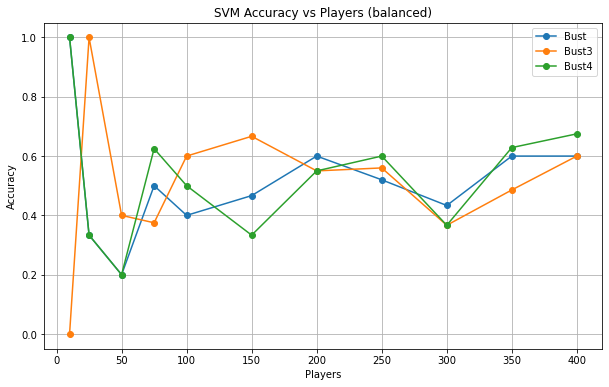

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed','Bust','Bust2', 'Bust3', 'Bust4']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust3'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]

print(data_filtered.shape)
# Different class sizes to try
class_sizes = [10, 25, 50, 75, 100, 150, 200, 250, 300, 350, 400]
accuracies_bust = []
accuracies_bust2 = []
accuracies_bust3 = []
accuracies_bust4 = []

for size in class_sizes:
    # Select samples for each class
    y_class = data_filtered[data_filtered['Bust2'] == 'Y'].sample(n=size//2, random_state=42)
    n_class = data_filtered[data_filtered['Bust2'] == 'N'].sample(n=size//2, random_state=42)

    # Combine the selected samples
    sampled_data = pd.concat([y_class, n_class], axis=0)
    
    # Prepare the data and labels
    X = sampled_data[['Strengths_Preprocessed','Weaknesses_Preprocessed']]
    y_bust = sampled_data['Bust']
    y_bust2 = sampled_data['Bust2']
    y_bust3 = sampled_data['Bust3']
    y_bust4 = sampled_data['Bust4']
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train_bust, y_test_bust = train_test_split(X_dense, y_bust, test_size=0.1, random_state=42)
    _, _, y_train_bust2, y_test_bust2 = train_test_split(X_dense, y_bust2, test_size=0.1, random_state=42)
    _, _, y_train_bust3, y_test_bust3 = train_test_split(X_dense, y_bust3, test_size=0.1, random_state=42)
    _, _, y_train_bust4, y_test_bust4 = train_test_split(X_dense, y_bust4, test_size=0.1, random_state=42)
    
     # Initialize Random Forest model
    svm_model = SVC(kernel='poly', C=1)
    # Fit the model on the training data for Bust
    svm_model.fit(X_train, y_train_bust)
    
    # Get predictions on the testing data for Bust
    y_pred_svm_bust = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust
    accuracy_bust = (y_pred_svm_bust == y_test_bust).mean()
    
    accuracies_bust.append(accuracy_bust)
    
    # Fit the model on the training data for Bust2
    svm_model.fit(X_train, y_train_bust2)
    
    # Get predictions on the testing data for Bust2
    y_pred_svm_bust2 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust2
    accuracy_bust2 = (y_pred_svm_bust2 == y_test_bust2).mean()
    
    accuracies_bust2.append(accuracy_bust2)
    
    # Fit the model on the training data for Bust3
    svm_model.fit(X_train, y_train_bust3)
    
    # Get predictions on the testing data for Bust3
    y_pred_svm_bust3 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust3
    accuracy_bust3 = (y_pred_svm_bust3 == y_test_bust3).mean()
    
    accuracies_bust3.append(accuracy_bust3)
    
        # Fit the model on the training data for Bust4
    svm_model.fit(X_train, y_train_bust4)
    
    # Get predictions on the testing data for Bust4
    y_pred_svm_bust4 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust4
    accuracy_bust4 = (y_pred_svm_bust4 == y_test_bust4).mean()
    
    accuracies_bust4.append(accuracy_bust4)

# Plot accuracy vs class size for Bust, Bust2 and Bust3
plt.figure(figsize=(10, 6))
plt.plot(class_sizes, accuracies_bust, marker='o', label='Bust')
#plt.plot(class_sizes, accuracies_bust2, marker='o', label='Bust2')
plt.plot(class_sizes, accuracies_bust3, marker='o', label='Bust3')
plt.plot(class_sizes, accuracies_bust4, marker='o', label='Bust4')
plt.xlabel('Players')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs Players (balanced)')
plt.legend()
plt.grid(True)
plt.show()


(545, 6)


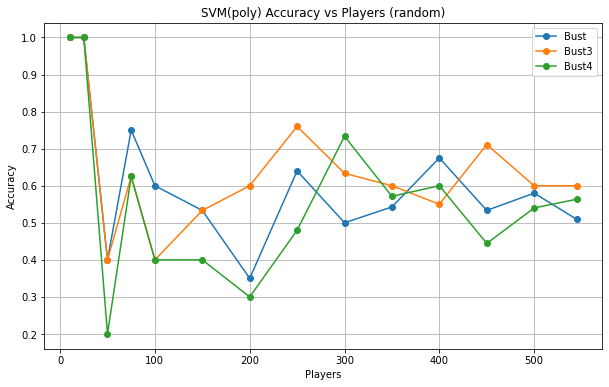

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed','Bust','Bust2', 'Bust3', 'Bust4']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust3'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]

print(data_filtered.shape)
# Different class sizes to try
class_sizes = [10, 25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 450, 500, 545]
accuracies_bust = []
accuracies_bust2 = []
accuracies_bust3 = []
accuracies_bust4 = []

for size in class_sizes:
    # Randomly sample samples from both classes combined
    sampled_data = data_filtered.sample(n=size, random_state=42)
    
    # Prepare the data and labels
    X = sampled_data[['Strengths_Preprocessed','Weaknesses_Preprocessed']]
    y_bust = sampled_data['Bust']
    y_bust2 = sampled_data['Bust2']
    y_bust3 = sampled_data['Bust3']
    y_bust4 = sampled_data['Bust4']
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train_bust, y_test_bust = train_test_split(X_dense, y_bust, test_size=0.1, random_state=42)
    _, _, y_train_bust2, y_test_bust2 = train_test_split(X_dense, y_bust2, test_size=0.1, random_state=42)
    _, _, y_train_bust3, y_test_bust3 = train_test_split(X_dense, y_bust3, test_size=0.1, random_state=42)
    _, _, y_train_bust4, y_test_bust4 = train_test_split(X_dense, y_bust4, test_size=0.1, random_state=42)
    
    # Create an SVM model with a polynomial kernel
    svm_model = SVC(kernel='poly', C=1)
    
    # Fit the model on the training data for Bust
    svm_model.fit(X_train, y_train_bust)
    
    # Get predictions on the testing data for Bust
    y_pred_svm_bust = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust
    accuracy_bust = (y_pred_svm_bust == y_test_bust).mean()
    
    accuracies_bust.append(accuracy_bust)
    
    # Fit the model on the training data for Bust2
    svm_model.fit(X_train, y_train_bust2)
    
    # Get predictions on the testing data for Bust2
    y_pred_svm_bust2 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust2
    accuracy_bust2 = (y_pred_svm_bust2 == y_test_bust2).mean()
    
    accuracies_bust2.append(accuracy_bust2)
    
    # Fit the model on the training data for Bust3
    svm_model.fit(X_train, y_train_bust3)
    
    # Get predictions on the testing data for Bust3
    y_pred_svm_bust3 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust3
    accuracy_bust3 = (y_pred_svm_bust3 == y_test_bust3).mean()
    
    accuracies_bust3.append(accuracy_bust3)
    
        # Fit the model on the training data for Bust4
    svm_model.fit(X_train, y_train_bust4)
    
    # Get predictions on the testing data for Bust4
    y_pred_svm_bust4 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust4
    accuracy_bust4 = (y_pred_svm_bust4 == y_test_bust4).mean()
    
    accuracies_bust4.append(accuracy_bust4)

# Plot accuracy vs class size for Bust, Bust2 and Bust3
plt.figure(figsize=(10, 6))
plt.plot(class_sizes, accuracies_bust, marker='o', label='Bust')
#plt.plot(class_sizes, accuracies_bust2, marker='o', label='Bust2')
plt.plot(class_sizes, accuracies_bust3, marker='o', label='Bust3')
plt.plot(class_sizes, accuracies_bust4, marker='o', label='Bust4')
plt.xlabel('Players')
plt.ylabel('Accuracy')
plt.title('SVM(poly) Accuracy vs Players (random)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import plotly.express as px

# Load data
df = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')
df = df[df['Bust'].isin(['Y', 'N'])]
# Filter to 'Bust' column
X = df[['Bust']] 

# Drop rows with TBD values
X = X[X['Bust'] != 'TBD']

# Convert to categorical
X = X.astype('category')

# Create and fit KModes
km = KModes(n_clusters=2)
clusters = km.fit_predict(X)

# Add cluster to dataframe
df['Cluster'] = clusters
# Add z column
df['z'] = 0
# Create 3D scatter plot
fig = px.scatter_3d(df, x='PLAYER_NAME', y='Bust', z='z',
                    color='Cluster', opacity=0.7)

fig.show()

In [5]:
#!pip install KModes


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed','Bust','Bust2', 'Bust3', 'Bust4']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust3'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]

print(data_filtered.shape)
# Different class sizes to try
class_sizes = [150]
accuracies_bust = []
accuracies_bust2 = []
accuracies_bust3 = []
accuracies_bust4 = []

for size in class_sizes:
    # Select samples for each class
    y_class = data_filtered[data_filtered['Bust2'] == 'Y'].sample(n=size//2, random_state=42)
    n_class = data_filtered[data_filtered['Bust2'] == 'N'].sample(n=size//2, random_state=42)

    # Combine the selected samples
    sampled_data = pd.concat([y_class, n_class], axis=0)
    
    # Prepare the data and labels
    X = sampled_data[['Strengths_Preprocessed','Weaknesses_Preprocessed']]
    y_bust = sampled_data['Bust']
    y_bust2 = sampled_data['Bust2']
    y_bust3 = sampled_data['Bust3']
    y_bust4 = sampled_data['Bust4']
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train_bust, y_test_bust = train_test_split(X_dense, y_bust, test_size=0.1, random_state=42)
    _, _, y_train_bust2, y_test_bust2 = train_test_split(X_dense, y_bust2, test_size=0.1, random_state=42)
    _, _, y_train_bust3, y_test_bust3 = train_test_split(X_dense, y_bust3, test_size=0.1, random_state=42)
    _, _, y_train_bust4, y_test_bust4 = train_test_split(X_dense, y_bust4, test_size=0.1, random_state=42)
    
     # Initialize Random Forest model
    svm_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    class_weight='balanced')
    # Fit the model on the training data for Bust
    svm_model.fit(X_train, y_train_bust)
    
    # Get predictions on the testing data for Bust
    y_pred_svm_bust = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust
    accuracy_bust = (y_pred_svm_bust == y_test_bust).mean()
    
    accuracies_bust.append(accuracy_bust)
    
    # Fit the model on the training data for Bust2
    svm_model.fit(X_train, y_train_bust2)
    
    # Get predictions on the testing data for Bust2
    y_pred_svm_bust2 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust2
    accuracy_bust2 = (y_pred_svm_bust2 == y_test_bust2).mean()
    
    accuracies_bust2.append(accuracy_bust2)
    
    # Fit the model on the training data for Bust3
    svm_model.fit(X_train, y_train_bust3)
    
    # Get predictions on the testing data for Bust3
    y_pred_svm_bust3 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust3
    accuracy_bust3 = (y_pred_svm_bust3 == y_test_bust3).mean()
    
    accuracies_bust3.append(accuracy_bust3)
    
        # Fit the model on the training data for Bust4
    svm_model.fit(X_train, y_train_bust4)
    
    # Get predictions on the testing data for Bust4
    y_pred_svm_bust4 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust4
    accuracy_bust4 = (y_pred_svm_bust4 == y_test_bust4).mean()
    
    accuracies_bust4.append(accuracy_bust4)

print(accuracy_bust3)

(545, 6)
0.8


(545, 6)
(150,)
Top 10 Features and Importance Scores:
1. Feature: hard, Importance Score: 0.0067
2. Feature: steal, Importance Score: 0.0059
3. Feature: good, Importance Score: 0.0056
4. Feature: game, Importance Score: 0.0052
5. Feature: move, Importance Score: 0.0051
6. Feature: big, Importance Score: 0.0050
7. Feature: floor, Importance Score: 0.0050
8. Feature: best, Importance Score: 0.0047
9. Feature: stand, Importance Score: 0.0045
10. Feature: get, Importance Score: 0.0045
Accuracy for Bust3: 69.57%


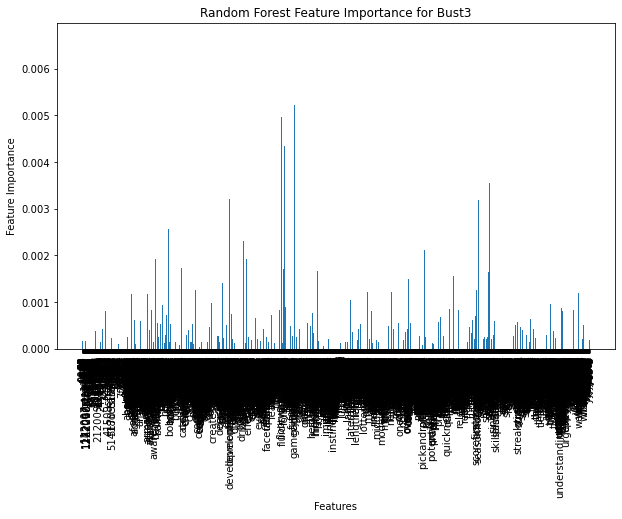

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed','Bust','Bust2', 'Bust3', 'Bust4']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust3'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]

print(data_filtered.shape)

# Select samples for each class
y_class = data_filtered[data_filtered['Bust3'] == 'Y'].sample(n=150//2, random_state=42)
n_class = data_filtered[data_filtered['Bust3'] == 'N'].sample(n=150//2, random_state=42)

# Combine the selected samples
sampled_data = pd.concat([y_class, n_class], axis=0)

# Prepare the data and labels
X = sampled_data[['Strengths_Preprocessed', 'Weaknesses_Preprocessed']]
y_bust3 = sampled_data['Bust3']
print(y_bust3.shape)
# Initialize CountVectorizer
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))

# Convert the sparse matrix to a dense numpy array
X_dense = X_vec.toarray()

# Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train_bust3, y_test_bust3 = train_test_split(X_dense, y_bust3, test_size=0.15, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    class_weight='balanced')

# Fit the model on the training data for Bust3
rf_model.fit(X_train, y_train_bust3)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort and get the top 10 features
top_10_indices = feature_importances.argsort()[::-1][:10]
top_10_features = [vectorizer.get_feature_names_out()[i] for i in top_10_indices]
top_10_scores = [feature_importances[i] for i in top_10_indices]

# Calculate accuracy for Bust3
accuracy_bust3 = (rf_model.predict(X_test) == y_test_bust3).mean()

# Print top 10 features with their importance scores
print("Top 10 Features and Importance Scores:")
for i, (feature, score) in enumerate(zip(top_10_features, top_10_scores), 1):
    print(f"{i}. Feature: {feature}, Importance Score: {score:.4f}")


# Print accuracy
print(f"Accuracy for Bust3: {accuracy_bust3 * 100:.2f}%")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=vectorizer.get_feature_names_out())
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance for Bust3')
plt.xticks(rotation=90)
plt.show()


In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed','Bust','Bust2', 'Bust3', 'Bust4']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust3'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]

# Convert 'Bust4' to numeric values
data_filtered['Bust4'] = data_filtered['Bust4'].map({'Y': 1, 'N': 0})

print(data_filtered.shape)
# Different class sizes to try
class_sizes = [400]
accuracies_bust = []
accuracies_bust2 = []
accuracies_bust3 = []
accuracies_bust4 = []

for size in class_sizes:
    # Select samples for each class
    y_class = data_filtered[data_filtered['Bust4'] == 1].sample(n=size//2, random_state=42)
    n_class = data_filtered[data_filtered['Bust4'] == 0].sample(n=size//2, random_state=42)
    print(y_class)
    # Combine the selected samples
    sampled_data = pd.concat([y_class, n_class], axis=0)
    
    # Prepare the data and labels
    X = sampled_data[['Strengths_Preprocessed','Weaknesses_Preprocessed']]
    y_bust = sampled_data['Bust']
    y_bust2 = sampled_data['Bust2']
    y_bust3 = sampled_data['Bust3']
    y_bust4 = sampled_data['Bust4']
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train_bust, y_test_bust = train_test_split(X_dense, y_bust, test_size=0.1, random_state=42)
    _, _, y_train_bust2, y_test_bust2 = train_test_split(X_dense, y_bust2, test_size=0.1, random_state=42)
    _, _, y_train_bust3, y_test_bust3 = train_test_split(X_dense, y_bust3, test_size=0.1, random_state=42)
    _, _, y_train_bust4, y_test_bust4 = train_test_split(X_dense, y_bust4, test_size=0.1, random_state=42)
    
     # Initialize Random Forest model
    svm_model = SVC(kernel='poly', C=1)
    # Fit the model on the training data for Bust
    svm_model.fit(X_train, y_train_bust)
    
    # Get predictions on the testing data for Bust
    y_pred_svm_bust = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust
    accuracy_bust = (y_pred_svm_bust == y_test_bust).mean()
    
    accuracies_bust.append(accuracy_bust)
    
    # Fit the model on the training data for Bust2
    svm_model.fit(X_train, y_train_bust2)
    
    # Get predictions on the testing data for Bust2
    y_pred_svm_bust2 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust2
    accuracy_bust2 = (y_pred_svm_bust2 == y_test_bust2).mean()
    
    accuracies_bust2.append(accuracy_bust2)
    
    # Fit the model on the training data for Bust3
    svm_model.fit(X_train, y_train_bust3)
    
    # Get predictions on the testing data for Bust3
    y_pred_svm_bust3 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust3
    accuracy_bust3 = (y_pred_svm_bust3 == y_test_bust3).mean()
    
    accuracies_bust3.append(accuracy_bust3)
    
        # Fit the model on the training data for Bust4
    svm_model.fit(X_train, y_train_bust4)
    
    # Get predictions on the testing data for Bust4
    y_pred_svm_bust4 = svm_model.predict(X_test)
    
    # Calculate accuracy for Bust4
    accuracy_bust4 = (y_pred_svm_bust4 == y_test_bust4).mean()
    
    accuracies_bust4.append(accuracy_bust4)

print(accuracy_bust4)

(545, 6)
                                 Strengths_Preprocessed  \
945   two time big 12 defensive player year javon ca...   
899   athletic forward smart decision maker versatil...   
1292  versatile player play forward position occasio...   
1068  athletic player play bigger 64 size great vert...   
1226  18yearold aussie fluid versatile athlete show ...   
...                                                 ...   
1375  best ability defensive end mick cronin elite d...   
1170  dawson game physical presence 4 crash board ha...   
1402  mentally strong dynamite offensive player grea...   
1394  center prospect great size length mobility eli...   
1011  610 250 pound posse body nba team covet led se...   

                                Weaknesses_Preprocessed Bust Bust2 Bust3  \
945   jevon carter fearless player wouldnt choose be...    Y     N     N   
899   need continue improve 1on1 skill ability creat...    N     N     N   
1292  great athlete limited leaping ability explosiv..

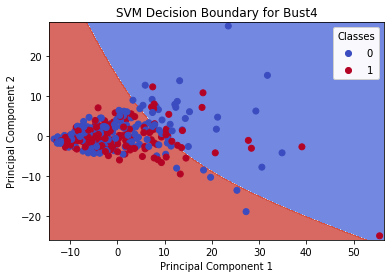

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit a PCA (Principal Component Analysis) on your training data for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)  # Use the same X_train you used for training

# Create a meshgrid with reduced density to plot decision boundaries
h = 0.1  # Adjusted step size in the mesh for density
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Transform the meshgrid points back to the original feature space
meshgrid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])

# Make predictions on the meshgrid points
Z = svm_model.predict(meshgrid_points)

# Convert the string labels 'Y' and 'N' to numerical values (1 and 0)
# y_train_bust4_numeric = np.where(y_train_bust4 == 'Y', 1, 0)

# Reshape predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot data points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_bust4, cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a legend
legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
plt.gca().add_artist(legend1)

plt.title('SVM Decision Boundary for Bust4')
plt.show()


In [45]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed','Bust','Bust2', 'Bust3', 'Bust4']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust2'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust3'].isin(['Y', 'N'])]
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]

print(data_filtered.shape)
# Different class sizes to try
class_sizes = [400]
accuracies_bust = []
accuracies_bust2 = []
accuracies_bust3 = []
accuracies_bust4 = []

for size in class_sizes:
    # Select samples for each class
    y_class = data_filtered[data_filtered['Bust4'] == 'Y'].sample(n=size//2, random_state=42)
    n_class = data_filtered[data_filtered['Bust4'] == 'N'].sample(n=size//2, random_state=42)
    # Combine the selected samples
    sampled_data = pd.concat([y_class, n_class], axis=0)
    
    # Prepare the data and labels
    X = sampled_data[['Strengths_Preprocessed','Weaknesses_Preprocessed']]
    y_bust = sampled_data['Bust']
    y_bust2 = sampled_data['Bust2']
    y_bust3 = sampled_data['Bust3']
    y_bust4 = sampled_data['Bust4']
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train_bust, y_test_bust = train_test_split(X_dense, y_bust, test_size=0.1, random_state=42)
    _, _, y_train_bust2, y_test_bust2 = train_test_split(X_dense, y_bust2, test_size=0.1, random_state=42)
    _, _, y_train_bust3, y_test_bust3 = train_test_split(X_dense, y_bust3, test_size=0.1, random_state=42)
    _, _, y_train_bust4, y_test_bust4 = train_test_split(X_dense, y_bust4, test_size=0.1, random_state=42)
    
     # Initialize Random Forest model
    svm_model = SVC(kernel='poly', C=1)
    # Fit the model on the training data for Bust4
    svm_model.fit(X_train, y_train_bust4)
    
    # Get predictions on the testing data for Bust4
    y_pred_svm_bust4 = svm_model.predict(X_test)
    
    y_pred_svm = svm_model.predict(X_test)
    accuracy_svm = accuracy_score(y_test_bust4, y_pred_svm)
    precision_svm = precision_score(y_test_bust4, y_pred_svm, pos_label='Y')
    recall_svm = recall_score(y_test_bust4, y_pred_svm, pos_label='Y')
    f1_svm = f1_score(y_test_bust4, y_pred_svm, pos_label='Y')

print('samples:',size)
print('accuracy_svm:',accuracy_svm)
print('precision_svm:',precision_svm)
print('recall_svm:',recall_svm)
print('f1_svm:',f1_svm)

# Different class sizes to try
class_sizes = [150]
accuracies_bust = []
accuracies_bust2 = []
accuracies_bust3 = []


for size in class_sizes:
    # Select samples for each class
    y_class = data_filtered[data_filtered['Bust3'] == 'Y'].sample(n=size//2, random_state=42)
    n_class = data_filtered[data_filtered['Bust3'] == 'N'].sample(n=size//2, random_state=42)
    # Combine the selected samples
    sampled_data = pd.concat([y_class, n_class], axis=0)
    
    # Prepare the data and labels
    X = sampled_data[['Strengths_Preprocessed','Weaknesses_Preprocessed']]
    y_bust = sampled_data['Bust']
    y_bust2 = sampled_data['Bust2']
    y_bust3 = sampled_data['Bust3']
    y_bust4 = sampled_data['Bust4']
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))
    
    # Convert the sparse matrix to a dense numpy array
    X_dense = X_vec.toarray()
    
    # Split the data into training and testing sets (90% training, 10% testing)
    X_train, X_test, y_train_bust, y_test_bust = train_test_split(X_dense, y_bust, test_size=0.1, random_state=42)
    _, _, y_train_bust2, y_test_bust2 = train_test_split(X_dense, y_bust2, test_size=0.1, random_state=42)
    _, _, y_train_bust3, y_test_bust3 = train_test_split(X_dense, y_bust3, test_size=0.1, random_state=42)
    _, _, y_train_bust4, y_test_bust4 = train_test_split(X_dense, y_bust4, test_size=0.1, random_state=42)
    
     # Initialize Random Forest model
    rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    class_weight='balanced')

    # Fit the model on the training data for Bust3
    rf_model.fit(X_train, y_train_bust3)
    
    # Get predictions on the testing data for Bust3
    y_pred_rf_bust3 = rf_model.predict(X_test)
    
    # Calculate accuracy for Bust4
    accuracy_bust3 = (y_pred_rf_bust3 == y_test_bust3).mean()
    
    accuracies_bust3.append(accuracy_bust3)
    
    # Make predictions for both models
    y_pred_rf = rf_model.predict(X_test)

    
    # Calculate evaluation metrics
    accuracy_rf = accuracy_score(y_test_bust3, y_pred_rf)
    precision_rf = precision_score(y_test_bust3, y_pred_rf, pos_label='Y')
    recall_rf = recall_score(y_test_bust3, y_pred_rf, pos_label='Y')
    f1_rf = f1_score(y_test_bust3, y_pred_rf, pos_label='Y')

print('samples:',size)
print('accuracy_rf:',accuracy_rf)
print('precision_rf:',precision_rf)
print('recall_rf:',recall_rf)
print('f1_rf:',f1_rf)

# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Support Vector Machine'],
    'Accuracy': [accuracy_rf, accuracy_svm],
    'Precision': [precision_rf, precision_svm],
    'Recall': [recall_rf, recall_svm],
    'F1 Score': [f1_rf, f1_svm]
})

# Define the categories (metrics) for the radar chart
categories = list(metrics_df.columns[1:])

# Create traces for each model
traces = []
for index, row in metrics_df.iterrows():
    traces.append(go.Scatterpolar(
        r=row[categories].tolist(),
        theta=categories,
        fill='toself',
        name=row['Model']
    ))

# Create the radar chart layout
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  # Adjust the range as needed
        ),
    ),
    showlegend=True
)

# Create the radar chart figure
fig = go.Figure(data=traces, layout=layout)

# Show the radar chart
fig.show()


(545, 6)
samples: 400
accuracy_svm: 0.7
precision_svm: 0.6363636363636364
recall_svm: 1.0
f1_svm: 0.7777777777777778
samples: 150
accuracy_rf: 0.8
precision_rf: 0.875
recall_rf: 0.7777777777777778
f1_rf: 0.823529411764706


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('C:\\Users\\beaud\\Downloads\\syr\\IST736\\players_with_busts3s.csv')

# Filter columns of interest
columns_of_interest = ['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'Overall', 'Bust4', 'SScore']
data_filtered = data[columns_of_interest].dropna()

# Drop rows with 'TBD' and 'MID' labels
data_filtered = data_filtered[data_filtered['Bust4'].isin(['Y', 'N'])]

# Convert "Overall" column to numeric, ignoring errors
data_filtered['Overall'] = pd.to_numeric(data_filtered['Overall'], errors='coerce')
data_filtered['SScore'] = pd.to_numeric(data_filtered['SScore'], errors='coerce')

# Different class sizes to try
class_size = 600  # Train on 600 players
accuracies = []

# Select samples for each class
y_class = data_filtered[data_filtered['Bust4'] == 'Y'].sample(n=class_size // 2, random_state=42)
n_class = data_filtered[data_filtered['Bust4'] == 'N'].sample(n=class_size // 2, random_state=42)

# Combine the selected samples
balanced_data = pd.concat([y_class, n_class], axis=0)

# Prepare the data and labels
X_train = balanced_data[['Strengths_Preprocessed', 'Weaknesses_Preprocessed', 'SScore', 'Overall']]
y_train = balanced_data['Bust4']

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Join all text columns with spaces
X_train['Text'] = X_train[['Strengths_Preprocessed', 'Weaknesses_Preprocessed']].apply(lambda x: ' '.join(x), axis=1)

# Convert "Overall" and "SScore" columns to strings before joining
X_train['Overall'] = X_train['Overall'].apply(lambda x: str(x))
X_train['SScore'] = X_train['SScore'].apply(lambda x: str(x))

# Fit-transform the 'Text' column
X_vec = vectorizer.fit_transform(X_train['Text'])

# Convert the sparse matrix to a dense numpy array
X_dense = X_vec.toarray()

# Split the data into train and test sets (10% as the testing set)
X_train, X_test, y_train, y_test = train_test_split(X_dense, y_train, test_size=0.1, random_state=42)

# Create and train a Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    class_weight='balanced'
)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the training set
y_pred_train_rf = rf_model.predict(X_train)

# Calculate evaluation metrics for the training set
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
precision_train_rf = precision_score(y_train, y_pred_train_rf, pos_label='Y')
recall_train_rf = recall_score(y_train, y_pred_train_rf, pos_label='Y')
f1_train_rf = f1_score(y_train, y_pred_train_rf, pos_label='Y')

# Print the training set evaluation metrics
print('Training set accuracy_rf:', accuracy_train_rf)
print('Training set precision_rf:', precision_train_rf)
print('Training set recall_rf:', recall_train_rf)
print('Training set f1_rf:', f1_train_rf)

# Predict on the test set
y_pred_test_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for the test set
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
precision_test_rf = precision_score(y_test, y_pred_test_rf, pos_label='Y')
recall_test_rf = recall_score(y_test, y_pred_test_rf, pos_label='Y')
f1_test_rf = f1_score(y_test, y_pred_test_rf, pos_label='Y')

# Print the test set evaluation metrics
print('Test set accuracy_rf:', accuracy_test_rf)
print('Test set precision_rf:', precision_test_rf)
print('Test set recall_rf:', recall_test_rf)
print('Test set f1_rf:', f1_test_rf)


Training set accuracy_rf: 0.987037037037037
Training set precision_rf: 0.9742647058823529
Training set recall_rf: 1.0
Training set f1_rf: 0.9869646182495345
Test set accuracy_rf: 0.75
Test set precision_rf: 0.8125
Test set recall_rf: 0.7428571428571429
Test set f1_rf: 0.7761194029850748


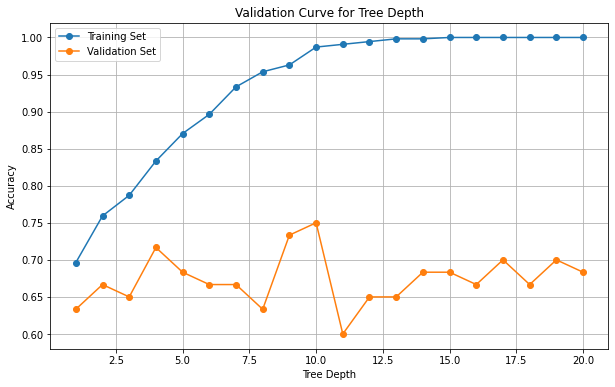

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib

# Define a range of tree depths to test
tree_depths = range(1, 21)

# Initialize empty lists to store training and validation scores
training_scores = []
validation_scores = []

for depth in tree_depths:
    # Create and train a Random Forest model with the current depth
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=depth,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        bootstrap=True,
        random_state=42,
        class_weight='balanced'
    )
    
    rf_model.fit(X_train, y_train)
    
    # Calculate training and validation scores
    training_score = rf_model.score(X_train, y_train)
    validation_score = rf_model.score(X_test, y_test)
    
    training_scores.append(training_score)
    validation_scores.append(validation_score)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, training_scores, label='Training Set', marker='o')
plt.plot(tree_depths, validation_scores, label='Validation Set', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve for Tree Depth')
plt.legend()
plt.grid(True)
plt.show()


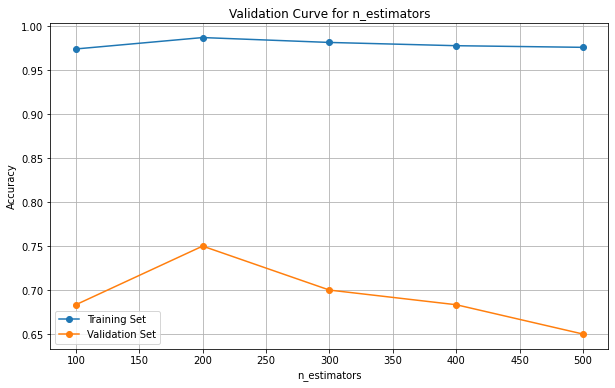

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of n_estimators values to test
n_estimators_values = [100, 200, 300, 400, 500]

# Initialize empty lists to store training and validation scores
training_scores = []
validation_scores = []

for n_estimators in n_estimators_values:
    # Create and train a Random Forest model with the current n_estimators value
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        bootstrap=True,
        random_state=42,
        class_weight='balanced'
    )
    
    rf_model.fit(X_train, y_train)
    
    # Calculate training and validation scores
    training_score = rf_model.score(X_train, y_train)
    validation_score = rf_model.score(X_test, y_test)
    
    training_scores.append(training_score)
    validation_scores.append(validation_score)

# Plot the validation curve for n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, training_scores, label='Training Set', marker='o')
plt.plot(n_estimators_values, validation_scores, label='Validation Set', marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Validation Curve for n_estimators')
plt.legend()
plt.grid(True)
plt.show()
